# Supervised learning for classification
Supervised learning means the system is learning from examples created by solution experts.  
Such a learning contains:
- features - independent data, base of classification
- label - depending from features, this data has to be predicted for unlabeled data

## Importing required modules

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

# Required to use matplotlib embedded in Jupyter notebook
%matplotlib inline

# set inline graph size
plt.rcParams['figure.figsize'] = [15, 5]

## Creating 2 clusters of random data 

In [38]:
# cluster centers
c1 = [6, 2]
c2 = [2, 6]

# create point cloud in the Origo
X = np.zeros((100, 2))

# create random labels
y = np.random.rand(1, 100).ravel() > 0.5

# move positive labeled points to near 1st cluster center 
X[y] = X[y] + c1

# move negative labeled points to near 2st cluster center 
X[np.invert(y)] = X[np.invert(y)] + c2

## Put random noise on point cloud

In [49]:
X_rnd = np.random.normal(loc=0, scale=1.0, size=(100, 2))
X = X + X_rnd

## Visualize labeled data

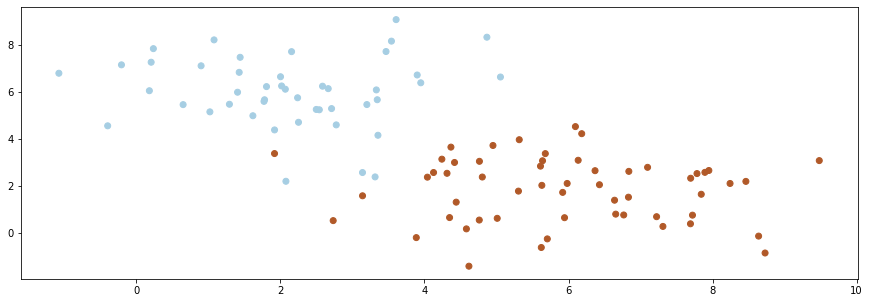

In [55]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

## Create datasets for teaching and testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Create and train classifier

In [51]:
classifier = linear_model.LogisticRegression(solver='lbfgs')
classifier.fit(X, y)
print("Learning accuracy: {0:.2f}%".format(classifier.score(X, y) * 100))

Learning accuracy: 97.00%


## Calculate and evaluate prediction for test data
Evaluation is about to compare true and predicted labels  

In [52]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Classification accuracy: {0:.2f}%".format(accuracy * 100))

Classification accuracy: 100.00%


## Create prediction for the whole sample space

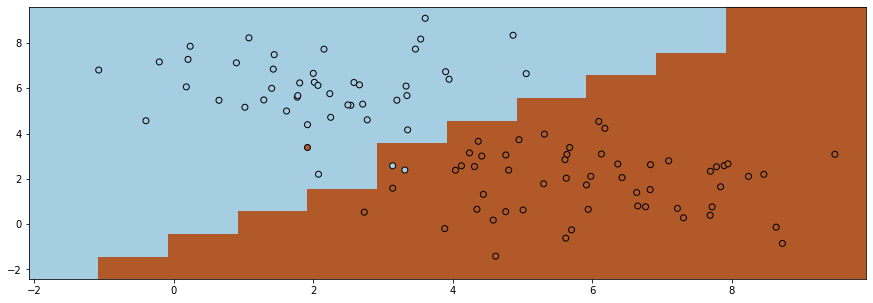

In [58]:
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1.0, X[:, 0].max() + 1.0),
    np.arange(X[:, 1].min() - 1.0, X[:, 1].max() + 1.0)
)

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()